T1, T2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x = [1, 3, 2, 8, 6, 7, -3, -2, -7]
y = [2, 3, 2, 8, 6, 7, -3, -4, -7]
data = [(e1, e2) for e1, e2 in zip(x, y)]
data = np.array(data)
N = len(data)
n_mixtures = 3
mu = np.array([(3, 3), (2, 2), (-3, -3)])
covar_mtx = [np.identity(2)]*n_mixtures
m = np.array([1/n_mixtures]*n_mixtures)

def e_step(data, m, mu, covar_mtx):
  w = np.zeros((N, n_mixtures))
  sum_prob = np.zeros(N)
  for j in range(n_mixtures):
    sum_prob += np.array(multivariate_normal.pdf(data, mean=mu[j], cov=covar_mtx[j])) * m[j] 
  for j in range(n_mixtures):
    w[:, j] = (np.array(multivariate_normal.pdf(data, mean=mu[j], cov=covar_mtx[j])) * m[j]) / sum_prob
  return w

def m_step(data, w):
  mu = np.zeros((n_mixtures, 2))
  m = w.sum(axis=0)/N
  covar_mtx_s = []
  w_sum = w.sum(axis=0)
  for j in range(n_mixtures):
    mu_sum = w[:, j].sum(axis=0)
    mu_tmp = (0, 0)
    for n in range(N):
      mu_tmp += w[n, j]*data[n]
    mu[j] = mu_tmp / mu_sum
  for j in range(n_mixtures):
    covar_mtx = np.zeros((2, 2))
    for i in range(N):
      covar_mtx += (w[i, j] * (data[i] - mu[j]).reshape((2, 1)) * (data[i] - mu[j]).reshape((1, 2)))

    covar_mtx /= w_sum[j]
    covar_mtx[0, 1] = 0
    covar_mtx[1, 0] = 0
    covar_mtx_s.append(covar_mtx)
  return m, mu, covar_mtx_s

def get_log_likelihood(m, mu, covar_mtx):
  log_likelihood = 0
  for n in range(N):
    each_data_prob = 0
    for j in range(n_mixtures):
      each_data_prob += multivariate_normal.pdf(data[n], mean=mu[j], cov=covar_mtx[j]) * m[j]
    log_likelihood += np.log(each_data_prob)
  return log_likelihood

iteration = 3
log_likelihood_list = []
for i in range(iteration):
  w_new = e_step(data, m, mu, covar_mtx)
  m, mu, covar_mtx = m_step(data, w_new)
  log_likelihood_list.append(get_log_likelihood(m, mu, covar_mtx))
  print(f'w: {w_new}')
  print(f'm: {m}')
  print(f'mu: {mu}')
  print(f'covar_mtx: {covar_mtx}')
  print(np.argmax(w_new, axis=1))
# x = np.arange(1,iteration+1)
# y = np.array(log_likelihood_list)
# plt.plot(x, y)
# plt.show()

w: [[1.19202922e-01 8.80797076e-01 1.81545808e-09]
 [7.31058579e-01 2.68941421e-01 1.69570706e-16]
 [2.68941421e-01 7.31058579e-01 1.01529005e-11]
 [9.99983299e-01 1.67014218e-05 2.03105874e-42]
 [9.99088949e-01 9.11051194e-04 5.37528453e-32]
 [9.99876605e-01 1.23394576e-04 3.30529272e-37]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [3.30570063e-37 5.90009054e-29 1.00000000e+00]]
m: [0.45757242 0.20909425 0.33333333]
mu: [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covar_mtx: [array([[4.53619412, 0.        ],
       [0.        , 4.28700611]]), array([[0.51645579, 0.        ],
       [0.        , 0.13152618]]), array([[4.66666668, 0.        ],
       [0.        , 2.88888891]])]
[1 0 1 0 0 0 2 2 2]
w: [[3.16932821e-003 9.96824702e-001 5.96935641e-006]
 [6.55101207e-001 3.44898109e-001 6.84250685e-007]
 [5.77503537e-003 9.94223665e-001 1.30002282e-006]
 [1.00000000e+000 9.14501760e-073 4.53098372e-01

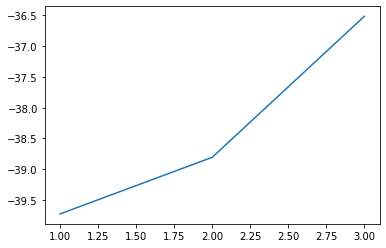

In [2]:
x = np.arange(1,iteration+1)
y = np.array(log_likelihood_list)
plt.plot(x, y)
plt.show()

T3, T4

In [3]:
n_mixtures = 2
mu = np.array([(3, 3), (-3, -3)])
covar_mtx = [np.identity(2)]*n_mixtures
m = np.array([1/n_mixtures]*n_mixtures)
log_likelihood_list_2 = []
iteration = 3
for i in range(iteration):
  w_new = e_step(data, m, mu, covar_mtx)
  m, mu, covar_mtx = m_step(data, w_new)
  log_likelihood_list_2.append(get_log_likelihood(m, mu, covar_mtx))
  print(f'w: {w_new}')
  print(f'm: {m}')
  print(f'mu: {mu}')
  print(f'covar_mtx: {covar_mtx}')


w: [[9.99999985e-01 1.52299795e-08]
 [1.00000000e+00 2.31952283e-16]
 [1.00000000e+00 3.77513454e-11]
 [1.00000000e+00 2.03109266e-42]
 [1.00000000e+00 5.38018616e-32]
 [1.00000000e+00 3.30570063e-37]
 [2.31952283e-16 1.00000000e+00]
 [2.31952283e-16 1.00000000e+00]
 [3.30570063e-37 1.00000000e+00]]
m: [0.66666666 0.33333334]
mu: [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covar_mtx: [array([[6.91666665, 0.        ],
       [0.        , 5.88888889]]), array([[4.66666677, 0.        ],
       [0.        , 2.8888891 ]])]
w: [[9.99879274e-01 1.20725832e-04]
 [9.99999741e-01 2.59403362e-07]
 [9.99975922e-01 2.40783341e-05]
 [1.00000000e+00 9.39286607e-19]
 [1.00000000e+00 7.41043154e-14]
 [1.00000000e+00 2.98366370e-16]
 [2.41448223e-04 9.99758552e-01]
 [1.52869075e-04 9.99847131e-01]
 [5.22429300e-09 9.99999995e-01]]
m: [0.66669436 0.33330564]
mu: [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covar_mtx: [array([[6.91944755, 0.        ],
       [0.        , 5.89275124]])

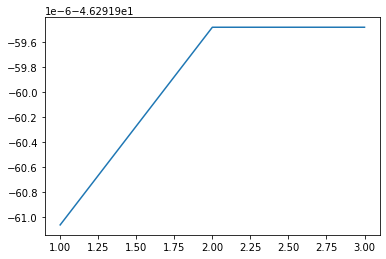

In [4]:
x = np.arange(1,iteration+1)
y = np.array(log_likelihood_list_2)
plt.plot(x, y)
plt.show()

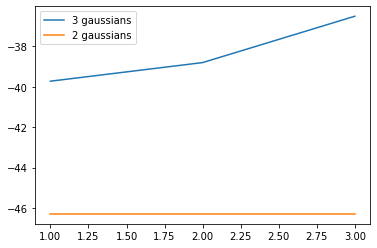


From the graph, it is clear that 3-gaussian is better than 2-gaussian in every iteration in terms of log-likelihood.



In [6]:
plt.plot(np.arange(1,iteration+1), log_likelihood_list, label='3 gaussians')
plt.plot(np.arange(1,iteration+1), log_likelihood_list_2, label='2 gaussians')
plt.legend()
plt.show()

explain = """
From the graph, it is clear that 3-gaussian is better than 2-gaussian in every iteration in terms of log-likelihood.
"""
print(explain)

In [ ]:
# !wget https://github.com/ekapolc/pattern_2022/blob/main/HW/HW03/facedata_mat.zip

In [8]:
import scipy.io
from skimage import img_as_float
x = scipy.io.loadmat('/content/facedata.mat')
xf = {}
for i in range(x['facedata'].shape[0]):
  for j in range(x['facedata'].shape[1]):
    xf[i, j] = img_as_float(x['facedata'][i, j])

T5

In [9]:
def euclidean_dis(a, b):
  dis = np.sqrt(np.sum(np.power(a.reshape(-1) - b.reshape(-1), 2)))
  return dis
print(euclidean_dis(xf[0, 0], xf[0, 1]))
print(euclidean_dis(xf[0, 0], xf[1, 0]))
explain = """
This number is a little bit strange for me because the similarity score of the images from the same person is more than the images from different person.
However, this can be used as similarity score to distinguish the person images. Ideally, the images from the same person should have less distance.
"""
print(explain)

10.037616294165492
8.173295099737281

This number is a little bit strange for me because the similarity score of the images from the same person is more than the images from different person.
However, this can be used as similarity score to distinguish the person images. Ideally, the images from the same person should have less distance.



T6

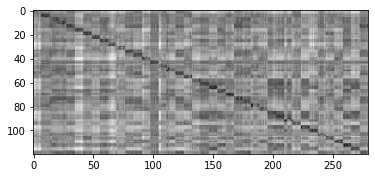

In [10]:
def get_similartity_mtx(T, D):
  m = len(T)
  n = len(D)
  A = np.zeros((m, n))
  for i in range(m):
    for j in range(n):
      A[i, j] = np.sqrt(np.sum(np.power(T[i].reshape(-1) - D[j].reshape(-1), 2)))
  plt.imshow(A, cmap="gray")
  plt.show()
  return A

def get_T_D(xf):
  T = []
  D = []
  for i in range(40):
    for j in range(10):
      if j <= 2:
        T.append(xf[i, j])
      else:
        D.append(xf[i, j])
  return T, D

T, D = get_T_D(xf)
A = get_similartity_mtx(T, D)

T7

In [11]:
print(f'In my opinion, the black square in [5:10, 5:10] represents the similarity between the images which come from the same people.')

In my opinion, the black square in [5:10, 5:10] represents the similarity between the images which come from the same people.


T8

In [12]:
def get_tp_fa(A, t):
  test_num = A.shape[1]
  train_num = A.shape[0]
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for test_idx in range(test_num):
    people_face_dis_list = [A.max()]*(train_num//3)
    for train_idx in range(train_num):
      people_face_dis_list[train_idx//3] = min(people_face_dis_list[train_idx//3], A[train_idx, test_idx])
    for idx, dis in enumerate(people_face_dis_list):
      if dis < t and test_idx//7 == idx:
        tp += 1
      elif dis >= t and test_idx//7 == idx:
        fn += 1
      elif dis < t and test_idx//7 != idx:
        fp += 1
      else:
        tn += 1
  tp_rate = tp/(tp + fn)
  fa_rate = fp/(fp + tn)
  return tp_rate, fa_rate

In [13]:
tp_rate, fa_rate = get_tp_fa(A, 10)
print(f'At t=10, tp_rate: {tp_rate}')
print(f'At t=10, fa_rate: {fa_rate}')

At t=10, tp_rate: 0.9964285714285714
At t=10, fa_rate: 0.4564102564102564


T9

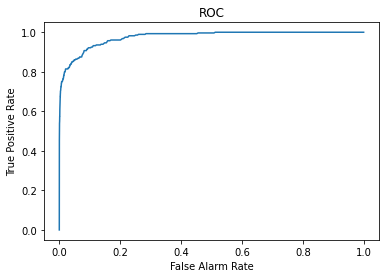

The lowest and the highest value of A should be the minimum and the maximum thresholds, respectively.


In [14]:
def plot_roc(A, num=1000):
  min_thres = A.min()
  max_thres = A.max()
  thres = np.linspace(min_thres, max_thres, num=num)
  tp_rate_list = []
  fa_rate_list = []
  all_rate = []
  for t in thres:
    tp_rate, fa_rate = get_tp_fa(A, t)
    tp_rate_list.append(tp_rate)
    fa_rate_list.append(fa_rate)
    all_rate.append((t, tp_rate, fa_rate))
  tp_rate_list, fa_rate_list = np.array(tp_rate_list), np.array(fa_rate_list)
  plt.title('ROC')
  plt.plot(fa_rate_list, tp_rate_list)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Alarm Rate')
  plt.show()
  return all_rate
all_rate = plot_roc(A)
print(f'The lowest and the highest value of A should be the minimum and the maximum thresholds, respectively.')

T10

In [15]:
for t, tp_rate, fa_rate in all_rate:
  if abs(tp_rate - 1 + fa_rate) <= 4e-3:
    print(f'EER: {t}')
    print(f'tp rate: {tp_rate}')
    print(f'fa rate: {fa_rate}')
  elif abs(fa_rate-0.0010) <= 9e-5:
    print(f'recall rate: {tp_rate} at False Alarm rate: 10%')

recall rate: 0.5428571428571428 at False Alarm rate: 10%
EER: 8.084041408785595
tp rate: 0.9071428571428571
fa rate: 0.08891941391941392


T11

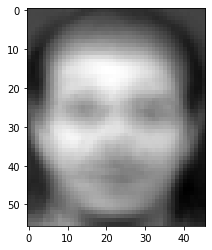

In [16]:
T_np = np.array(T)
D_np = np.array(D)
average_face = np.average(T_np, axis=0)
plt.imshow(average_face, cmap="gray")
plt.show()

T12

In [17]:
X_tmp = np.concatenate((T_np, D_np), axis=0)
X = (X_tmp - average_face).reshape((len(X_tmp), 56*46)).T
cov_mtx = X.dot(X.T)
print(f'The dimension of covariance matrix is {cov_mtx.shape}')
print(f'The rank of covariance matrix is {np.linalg.matrix_rank(cov_mtx)}')

The dimension of covariance matrix is (2576, 2576)
The rank of covariance matrix is 399


T13

In [18]:
gram = X.T.dot(X)
print(f'The size of Gram matrix is {gram.shape}')
print(f'The rank of Gram matrix is {np.linalg.matrix_rank(gram)}')
print(f'We expect to get {len(X_tmp)-1} non-zero values')

The size of Gram matrix is (400, 400)
The rank of Gram matrix is 399
We expect to get 399 non-zero values


T14

In [19]:
def is_symmetric(A):
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      if i == j:
        continue
      elif A[i, j] != A[j, i]:
        return False
  return True
is_sym = is_symmetric(gram)
print(f'Gram is a symmetric matrix: {is_sym}')
explain = """
X -> mxn matrix
X.T -> nxm matrix
gram[i, j] is computed by X.T[i, :].dot(X[:, j])
and gram[j, i] is computed by X.T[j, :].dot(X[:, i])
we also know that a.dot(b) equals b.dot(a)
In addition, X.T[i, :] = X[:, i] and X[:, j] = X.T[j, :].
As a result, gram is a symmetric matrix.
"""
print(explain)

Gram is a symmetric matrix: True

X -> mxn matrix
X.T -> nxm matrix
gram[i, j] is computed by X.T[i, :].dot(X[:, j])
and gram[j, i] is computed by X.T[j, :].dot(X[:, i])
we also know that a.dot(b) equals b.dot(a)
In addition, X.T[i, :] = X[:, i] and X[:, j] = X.T[j, :].
As a result, gram is a symmetric matrix.



T15

In [20]:
X_tmp = np.concatenate((T_np, D_np), axis=0)
X = (X_tmp - average_face).reshape((len(X_tmp), 56*46)).T
gram = X.T.dot(X)
eigen_val, eigen_vec = np.linalg.eigh(gram)
eigen_val = eigen_val[::-1]
eigen_vec = eigen_vec[:, ::-1]
non_zero_eigen = len([a for a in eigen_val if a >= 1e-4])
print(f'There are {non_zero_eigen} of non zero eigen values')

There are 399 of non zero eigen values


T16

We use 136 eigens value to keep 95% of the original variance.


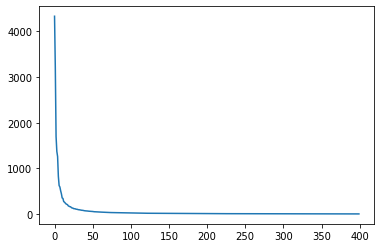

In [21]:
all_var = np.sum(eigen_val)
proportion_var = all_var*.95
var_sum = 0
for idx, eigen_value in enumerate(eigen_val):
  var_sum += eigen_value
  if var_sum >= proportion_var:
    print(f'We use {idx+1} eigens value to keep 95% of the original variance.')
    break
plt.plot(np.arange(len(eigen_val)),np.array(eigen_val))
plt.show()

T17, T18

(2576, 400)


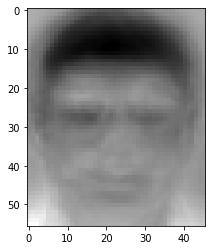

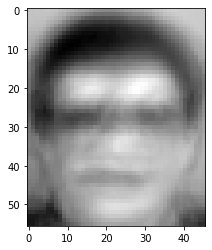

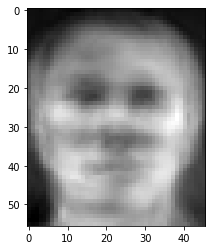

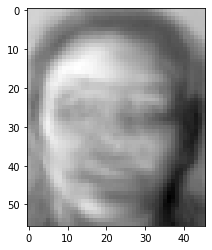

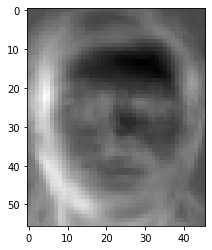

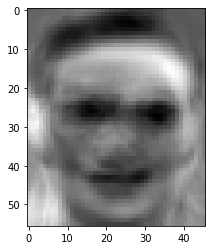

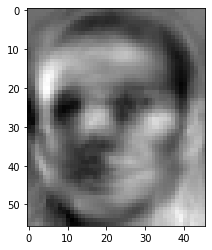

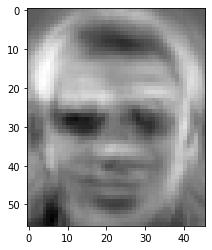

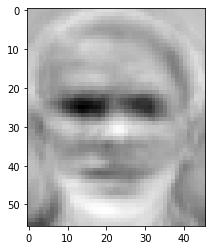

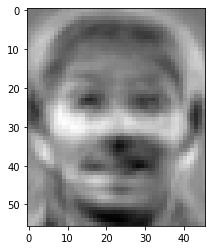

In [22]:
v = X.dot(eigen_vec)
print(v.shape)
new_v = []
for i in range(v.shape[1]):
  v_size = np.linalg.norm(v[:, i], axis=0)
  new_v.append(v[:, i]/v_size)
new_v = np.array(new_v)
for i in range(10):
  plt.imshow(new_v[i].reshape((56, 46)), cmap="gray")
  plt.show()

In [23]:
explain = """
I think in the first eigen face, it captures the shirt of the person as the color of the shirt is brightest among other pixels.
Regarding the second eigen face, it reflects the forehead of a person.
After observing the original images, I think it is quite reasonable that why these two eigen images are the ones that have the highest variances.
"""
print(explain)


I think in the first eigen face, it captures the shirt of the person as the color of the shirt is brightest among other pixels.
Regarding the second eigen face, it reflects the forehead of a person.
After observing the original images, I think it is quite reasonable that why these two eigen images are the ones that have the highest variances.



T19

(400, 2576)
(2576, 400)
(10, 400)


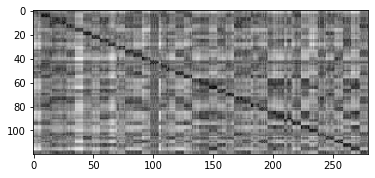

In [24]:
k = 10
def get_proj_A(new_v, X, k):
  print(new_v.shape)
  print(X.shape)
  p = new_v[:k, :].dot(X)
  print(p.shape)
  proj_T = [p[:, e] for e in range(len(T_np))]
  proj_D = [p[:, e+len(T_np)] for e in range(len(D_np))]
  proj_A = get_similartity_mtx(proj_T, proj_D)
  return proj_A
proj_A = get_proj_A(new_v, X, k)

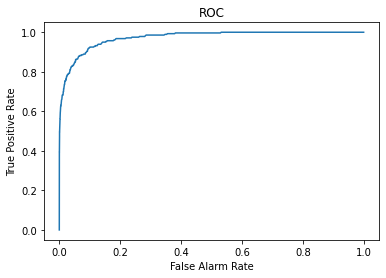

In [25]:
all_rate = plot_roc(proj_A)

In [26]:
for t, tp_rate, fa_rate in all_rate:
  if abs(tp_rate - 1 + fa_rate) <= 1e-3:
    print(f'EER: {t}')
    print(f'tp rate: {tp_rate}')
    print(f'fa rate: {fa_rate}')
  elif abs(fa_rate-0.0010) <= 8e-6:
    print(f'recall rate: {tp_rate} at False Alarm rate: 10%')

recall rate: 0.49642857142857144 at False Alarm rate: 10%


In [27]:
def get_EER(all_rate, thres = 5e-3):
  found = False
  for t, tp_rate, fa_rate in all_rate:
    if abs(tp_rate - 1 + fa_rate) <= thres:
      print(f'EER: {t}')
      print(f'tp rate: {tp_rate}')
      print(f'fa rate: {fa_rate}')
      found = True
      return fa_rate
  if not found:
    thres *= 5
    for t, tp_rate, fa_rate in all_rate:
      if abs(tp_rate - 1 + fa_rate) <= thres:
        print(f'EER: {t}')
        print(f'tp rate: {tp_rate}')
        print(f'fa rate: {fa_rate}')
        found = True
        return fa_rate
  return None

T20

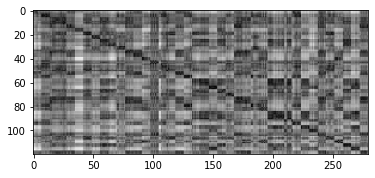

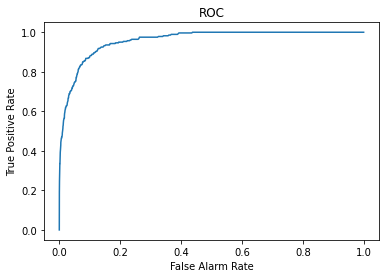

EER: 3.7953349100103035
tp rate: 0.8892857142857142
fa rate: 0.10787545787545788


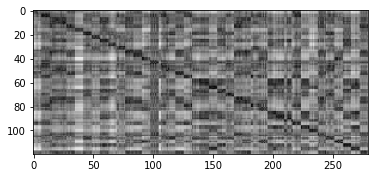

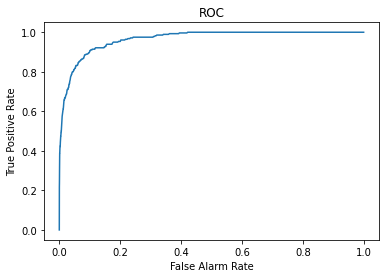

EER: 4.121874347832106
tp rate: 0.9
fa rate: 0.09926739926739926


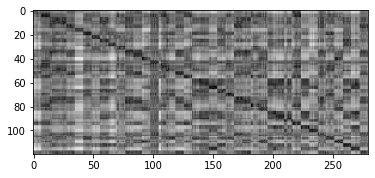

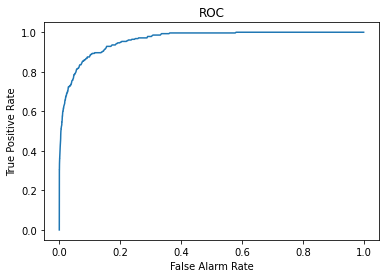

EER: 4.5143506004730884
tp rate: 0.8892857142857142
fa rate: 0.10668498168498168


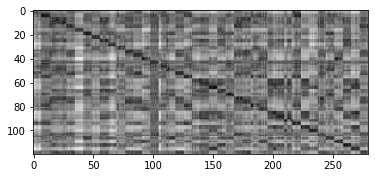

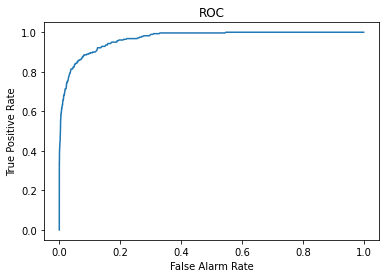

EER: 4.774242606705676
tp rate: 0.8964285714285715
fa rate: 0.1021978021978022


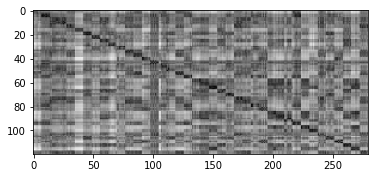

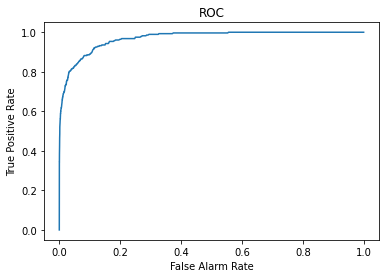

EER: 4.977575628236426
tp rate: 0.8928571428571429
fa rate: 0.10338827838827838


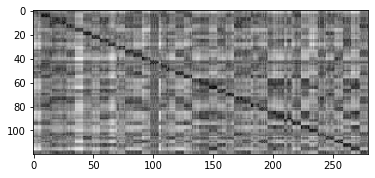

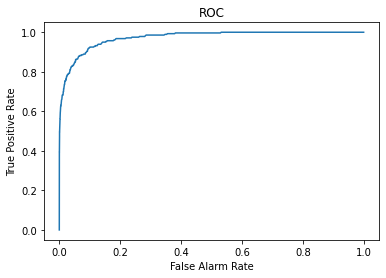

EER: 5.076764584287691
tp rate: 0.9035714285714286
fa rate: 0.0923992673992674


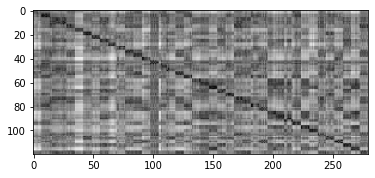

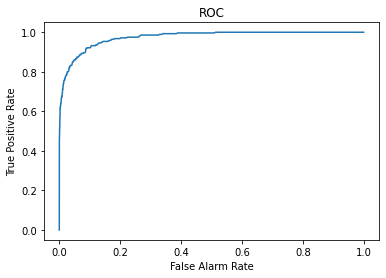

EER: 5.096791978726898
tp rate: 0.8964285714285715
fa rate: 0.07948717948717948


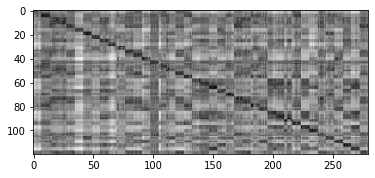

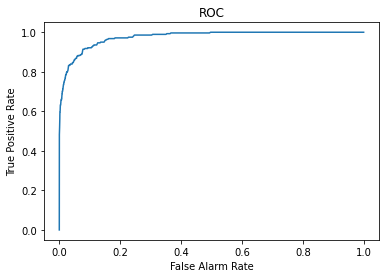

EER: 5.270998441833673
tp rate: 0.9142857142857143
fa rate: 0.08131868131868132


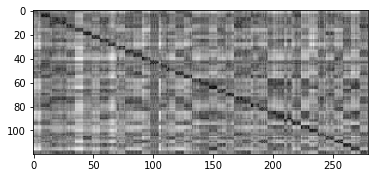

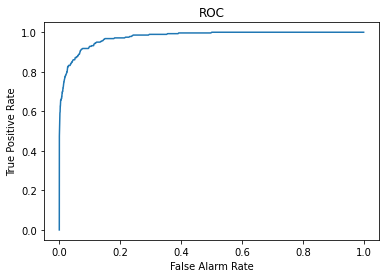

EER: 5.32466894402587
tp rate: 0.9178571428571428
fa rate: 0.07756410256410257


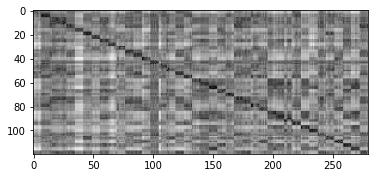

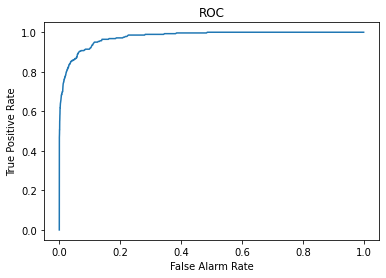

EER: 5.5541144674255225
tp rate: 0.9142857142857143
fa rate: 0.08571428571428572


In [ ]:
k_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
eer_list = []
for k in k_list:
  proj_A = get_proj_A(new_v, X, k)
  all_rate = plot_roc(proj_A)
  eer_list.append((k, get_EER(all_rate)))

In [ ]:
eer_list_tmp = np.array([e for _, e in eer_list])
best_k = eer_list[np.argmin(eer_list_tmp)][0]
print(f'best eer is when k = {best_k}')

best eer is when k = 13


T21

In [28]:
print(f'The rank must be {min(40-1, 120-40)}')

The rank must be 39


T22

In [29]:
X_train = (T_np - average_face).reshape((len(T_np), 56*46)).T

In [30]:
X_train.shape

(2576, 120)

In [31]:
C = 40
LDA_dim = 120 - C
proj_PCA = new_v[:LDA_dim, :].dot(X_train)
proj_PCA.shape

(80, 120)

In [32]:
C = 40
LDA_dim = 120 - C
proj_PCA = new_v[:LDA_dim, :].dot(X_train)
global_mean = np.mean(proj_PCA, axis=1)
# class_mean = np.zeros((40, 10, LDA_dim))
class_mean = np.zeros((40, 3, LDA_dim))
proj_T = np.array([proj_PCA[:, e] for e in range(len(T_np))])
# proj_D = np.array([proj_PCA[:, e+len(T_np)] for e in range(len(D_np))])
test = {}
members = {}
for i in range(40):
  members[i] = []
for i in range(len(proj_T)):
  members[i//3].append(proj_T[i])
  class_mean[i//3, i%3, :] = proj_T[i]
print(class_mean.shape)
# print(members[0])
# for i in range(len(proj_D)):
#   members[i//7].append(proj_D[i])
#   test[(i//7, i%7+3)] = True
#   class_mean[i//7, i%7+3, :] = proj_D[i]
within_class_mean = np.mean(class_mean, axis=1)
S_B = np.zeros((LDA_dim, LDA_dim))

for c in range(C):
  diff = (within_class_mean[c].reshape((LDA_dim, 1)) - global_mean.reshape((LDA_dim, 1)))
  S_B += diff.dot(diff.T)
S_W = np.zeros((LDA_dim, LDA_dim))
for c in range(C):
  for member in members[c]:
    diff = member.reshape((LDA_dim, 1)) - within_class_mean[c].reshape((LDA_dim, 1))
    S_W += diff.dot(diff.T)
# print(S_W)
S_W_inv_S_B_sym = is_symmetric(np.linalg.inv(S_W).dot(S_B))
if S_W_inv_S_B_sym:
  eigen_val_LDA, eigen_vec_LDA = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))
else:
  eigen_val_LDA, eigen_vec_LDA = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
  
non_zero = len([e for e in eigen_val_LDA if np.real(e) >= 1e-5])
print(f'We can use numpy.linalg.eig as the S_W inverse x S_B is symmetric: {S_W_inv_S_B_sym}')
print(f'There are {non_zero} non-zero values in eigen values')

(40, 3, 80)
We can use numpy.linalg.eig as the S_W inverse x S_B is symmetric: False
There are 39 non-zero values in eigen values


T23

In [33]:
explain = """
It is completely different from PCA projection since the eigen face of the LDA belongs to some people, 
while the PCA's eigenfaces look like the the average of people faces.
"""
print(explain)


It is completely different from PCA projection since the eigen face of the LDA belongs to some people, 
while the PCA's eigenfaces look like the the average of people faces.



(80, 2576)


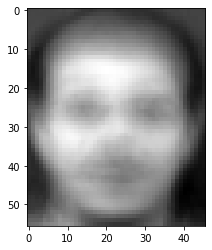

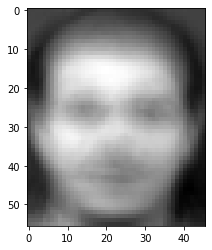

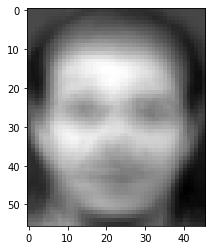

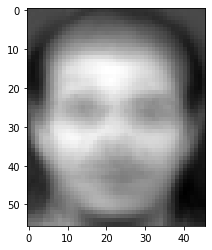

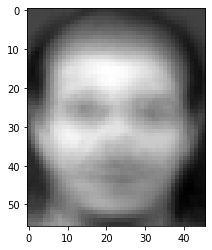

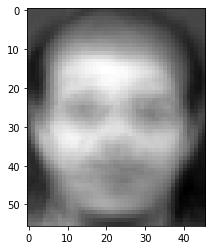

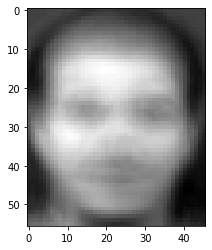

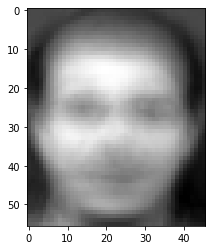

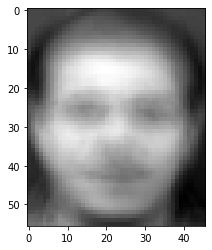

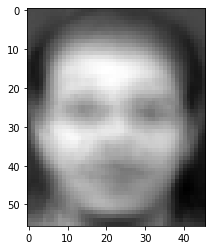

In [34]:
v_LDA = eigen_vec_LDA.dot(new_v[:LDA_dim, :])
print(v_LDA.shape)
v_LDA_ = np.real(v_LDA) + average_face.reshape((-1, 2576))
for i in range(10):
  plt.imshow(np.real(v_LDA_[i]).reshape((56, 46)), cmap="gray")
  plt.show()

T24

In [35]:
v_LDA.shape

(80, 2576)

In [36]:
eigen_vec_LDA.shape

(80, 80)

(80, 80)
(80, 400)
(10, 400)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


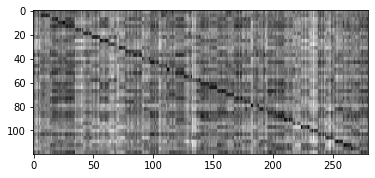

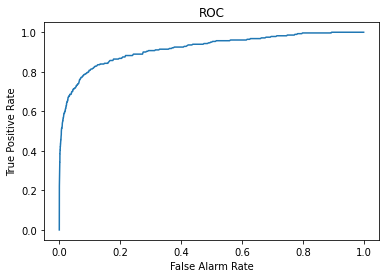

EER: 1.8818735420836101
tp rate: 0.8428571428571429
fa rate: 0.15247252747252749


0.15247252747252749

In [37]:
# proj_A_LDA = get_proj_A(eigen_vec_LDA.T, proj_PCA, 10)
proj_PCA_train_and_test = new_v[:LDA_dim, :].dot(X)
proj_A_LDA = get_proj_A(eigen_vec_LDA.T, proj_PCA_train_and_test, 10)
all_rate = plot_roc(proj_A_LDA)
get_EER(all_rate, thres = 5e-3)

In [38]:
for t, tp_rate, fa_rate in all_rate:
  if abs(fa_rate-0.0010) <= 8.45e-5:
    print(f'recall rate: {tp_rate} at False Alarm rate: 10%')
    break

recall rate: 0.29642857142857143 at False Alarm rate: 10%


T25

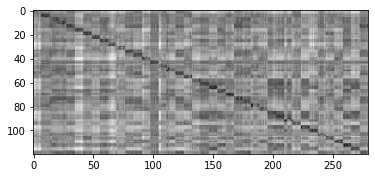

(400, 2576)
(2576, 400)
(10, 400)


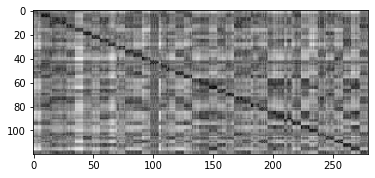

(80, 80)
(80, 400)
(10, 400)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


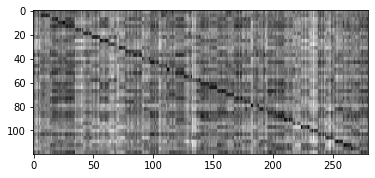

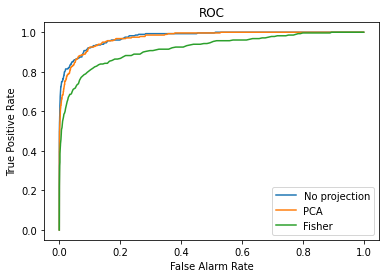


Actually, the result is quite different from what I have expected as the fisher algorithm underperform. This may be due to the number of training data and 
the testing data since the number of training data is two times less than those of training data.



In [39]:
A = get_similartity_mtx(T, D)
A_PCA = get_proj_A(new_v, X, k=10)
A_LDA = get_proj_A(eigen_vec_LDA.T, proj_PCA_train_and_test, 10)
num = 1000
min_thres = min(A.min(), A_PCA.min(), A_LDA.min())
max_thres = max(A.max(), A_PCA.max(), A_LDA.max())
thres = np.linspace(min_thres, max_thres, num=num)
tp_rate_list = []
fa_rate_list = []
tp_rate_list_PCA = []
fa_rate_list_PCA = []
tp_rate_list_LDA = []
fa_rate_list_LDA = []
for t in thres:
  tp_rate, fa_rate = get_tp_fa(A, t)
  tp_rate_list.append(tp_rate)
  fa_rate_list.append(fa_rate)

  tp_rate_PCA, fa_rate_PCA = get_tp_fa(A_PCA, t)
  tp_rate_list_PCA.append(tp_rate_PCA)
  fa_rate_list_PCA.append(fa_rate_PCA)

  tp_rate_LDA, fa_rate_LDA = get_tp_fa(A_LDA, t)
  tp_rate_list_LDA.append(tp_rate_LDA)
  fa_rate_list_LDA.append(fa_rate_LDA)

tp_rate_list, fa_rate_list = np.array(tp_rate_list), np.array(fa_rate_list)
tp_rate_list_PCA, fa_rate_list_PCA = np.array(tp_rate_list_PCA), np.array(fa_rate_list_PCA)
tp_rate_list_LDA, fa_rate_list_LDA = np.array(tp_rate_list_LDA), np.array(fa_rate_list_LDA)
plt.title('ROC')
plt.plot(fa_rate_list, tp_rate_list, label="No projection")
plt.plot(fa_rate_list_PCA, tp_rate_list_PCA, label="PCA")
plt.plot(fa_rate_list_LDA, tp_rate_list_LDA, label="Fisher")
plt.ylabel('True Positive Rate')
plt.xlabel('False Alarm Rate')
plt.legend(loc="lower right")
plt.show()

explain = """
Actually, the result is quite different from what I have expected as the fisher algorithm underperform. This may be due to the number of training data and 
the testing data since the number of training data is two times less than those of training data.
"""

print(explain)